In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

****************************************
RUNNING IN DEVELOP
****************************************


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
np.random.RandomState(12345)

In [3]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [4]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)


In [5]:
reload(a2)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [6]:
data = a2.Data(spots_dj=spots_dj)
frames = []
for n, d in data.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"])
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
lb = pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])  
#lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

In [7]:
lb.to_clipboard()

In [8]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LF-0.05,0.0500,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),513.863166,1132.621738,0.408333,2018_03_21_slide_50,microarray_2018_03_21,57.0,14.0,quant1,0.0
2,LF-0.05,0.0500,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),362.647574,245.234317,0.491667,2018_03_21_slide_50,microarray_2018_03_21,57.0,13.0,quant1,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LF-0.5,0.5000,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),238.700508,168.557049,0.541667,2018_03_21_slide_50,microarray_2018_03_21,57.0,9.0,quant1,0.0
7,LF-0.0001,0.0001,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),352.451777,373.308699,0.687500,2018_03_21_slide_50,microarray_2018_03_21,57.0,8.0,quant1,0.0
8,LF-0.001,1.0000,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),256.827411,161.209989,0.625000,2018_03_21_slide_50,microarray_2018_03_21,57.0,7.0,quant1,0.0
9,P091,1.0000,P091,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),463.865524,379.883171,0.617188,2018_03_21_slide_50,microarray_2018_03_21,52.0,5.0,quant1,0.0


In [9]:
data.x

Ligand Batch                                                     LF-0.0001  \
Analyte Batch                     Collection          Replica                
A/Aichi/2/68(H3N2)-X31-2018-04-13 2018_03_21_slide_58 0.0        66.717563   
                                                      1.0        77.802083   
                                                      2.0        66.477876   
                                                      3.0      1336.681416   
                                                      4.0        75.926424   
                                                      5.0        82.935127   
                                                      6.0        89.316456   
                                                      7.0       109.716814   
                                                      8.0        77.996044   
                                                      9.0       243.363985   
                                                      10.0      243.363985   
                                                      11.0      243.363985   
                                                      12.0      243.363985   
                                                      13.0      243.363985   
                                                      14.0      243.363985   
                                                      15.0      243.363985   
                                                      16.0      243.363985   
                                                      17.0      243.363985   
                                                      18.0      243.363985   
                                                      19.0      243.363985   
                                                      20.0      243.363985   
                                                      21.0      243.363985   
                                                      22.0      243.363985   
                                                      23.0      243.363985   
                                                      24.0      243.363985   
                                                      25.0      243.363985   
                                                      26.0      243.363985   
                                                      27.0      243.363985   
                                                      28.0      243.363985   
                                                      29.0      243.363985   
...                                                                    ...   
VicAlla-2018-04-13                2018_03_21_slide_69 24.0      243.363985   
                                                      25.0      243.363985   
                                                      26.0      243.363985   
                                                      27.0      243.363985   
                                                      28.0      243.363985   
                                                      29.0      243.363985   
                                                      30.0      243.363985   
                                                      31.0      243.363985   
                                                      32.0      243.363985   
                                                      33.0      243.363985   
                                                      34.0      243.363985   
                                                      35.0      243.363985   
                                                      36.0      243.363985   
                                                      37.0      243.363985   
                                                      38.0      243.363985   
                                                      39.0      243.363985   
                                                      40.0      243.363985   
                                                      41.0      243.363985   
                      

In [10]:
lb

Ligand Batch
P084         47
P102         45
P071         44
Nenad        42
P125         41
P104         41
P070         40
P116         40
P127         40
P100         38
P065         37
P061         37
P106         37
P044         35
P120         35
P131.1       34
P008         34
P069         34
P072         34
P073         34
LF-0.1       32
P082         32
P132         32
P052         32
P099         32
P131.2       32
P060         31
P007         31
P121         31
P115         31
             ..
LF-0.05      21
P136         21
P050         21
P047         19
P054         19
P122         18
P057         18
P128         18
P094         17
P095         13
P066         13
P134         12
P081         12
P098         12
P089         12
P009         11
P086         10
P013         10
P077         10
P119          8
P074          8
LF-0.0001     6
LF-0.5        3
P118          0
P059          0
P048          0
P045.3        0
LF-0.001      0
P114          0
P075          0
Length: 85,

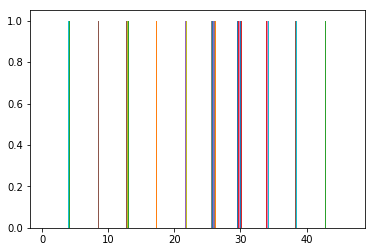

In [11]:
plt.hist(lb)
plt.show()

In [12]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [13]:
col = data.spots_pd["Collection"].unique()

train_test =[ tuple(col),tuple(col)]


In [14]:
cs = data.spots_pd["Collection"].unique()

In [15]:

complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

for i, row in enumerate(test[:50]):
    complete.set_value(i, "Test", row)
    complete.set_value(i, "Train", tuple(set(cs) - set(row)))



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [16]:
complete

,Test,Train
0,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
1,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
2,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
3,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
4,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
5,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
6,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
7,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
8,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."
9,"(2018_03_21_slide_61, 2018_03_21_slide_55, 201...","(nan, 2018_03_21_slide_69, 2018_03_21_slide_42..."


In [17]:
pprint(pbs_len)

Pretty printing has been turned OFF


In [18]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj)
#data = clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [19]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [20]:
result["TrueFalse"].value_counts()

0    677079
1    141921
Name: TrueFalse, dtype: int64

In [21]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [22]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data
one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

ValueError: attempt to get argmax of an empty sequence

In [23]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [24]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [25]:
result_mean["Name"] = "Mean" 
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

In [26]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


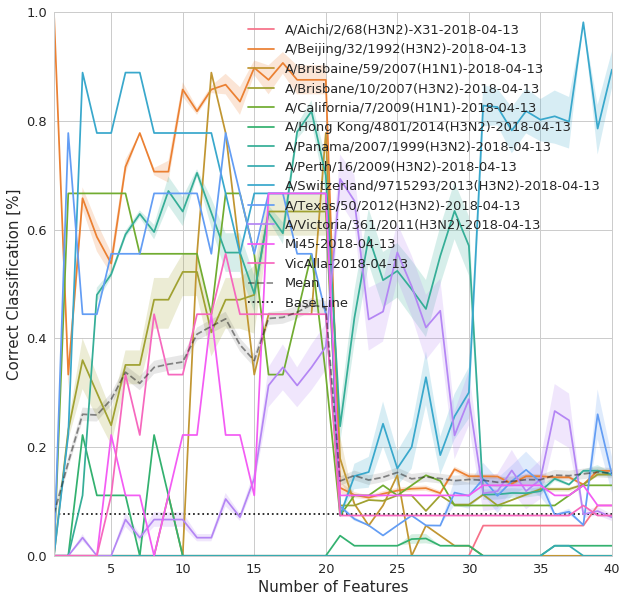

In [27]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
#ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)

ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


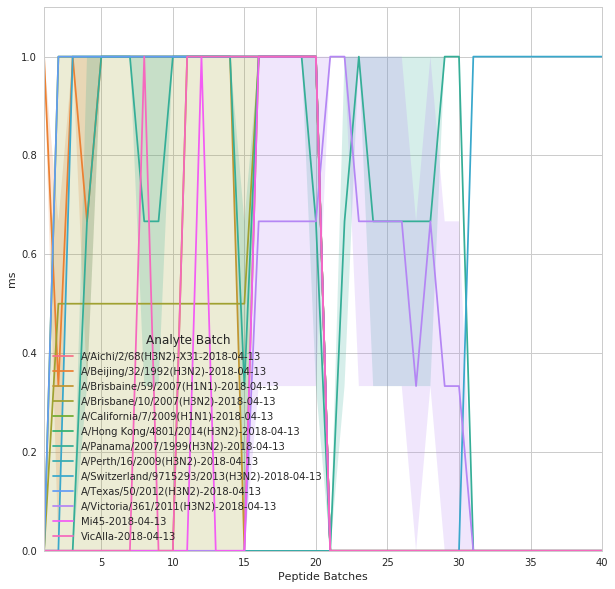

In [28]:


fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m)
ax.set_ylim(0,1.1)
plt.show()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


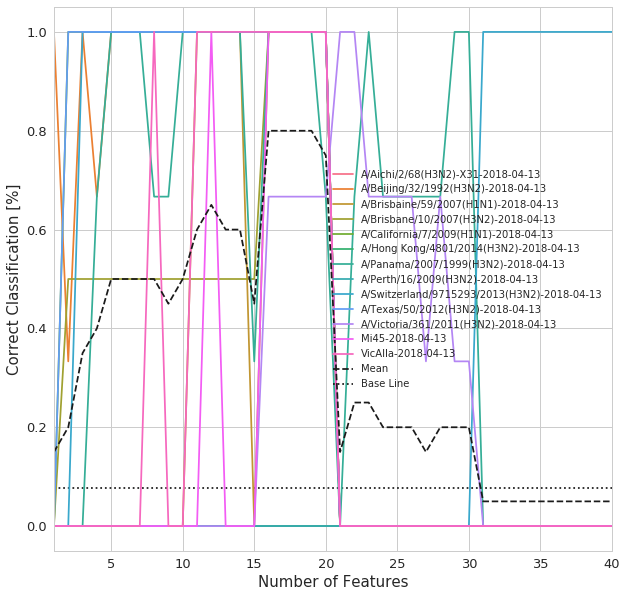

In [29]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
plt.legend()

#ax.set_ylim(0,1.1)
plt.show()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


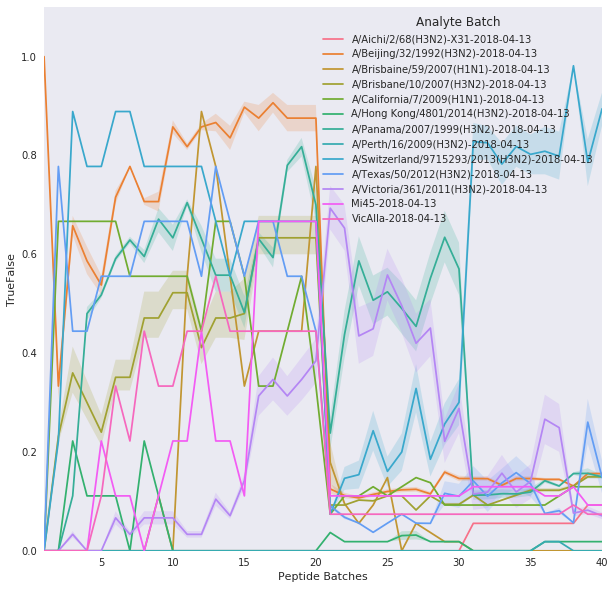

In [30]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

In [ ]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [129]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label'



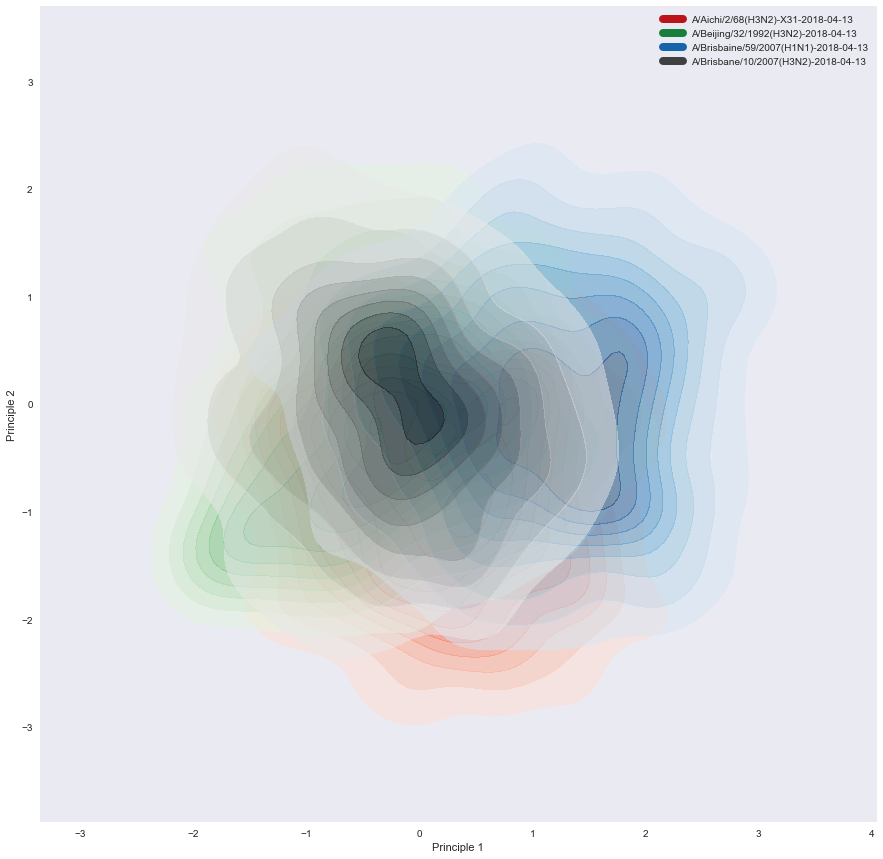

In [130]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [131]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

2.2.3


In [132]:
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(200).clean()
from sklearn import preprocessing

/home/janek89/Dev/flutype_analysis_web/preprocessing.py:14: RuntimeWarning:

invalid value encountered in double_scalars



In [133]:
test_data = data.x_pca_fit().transform(data.x)


In [134]:
le = preprocessing.LabelEncoder()

In [135]:
le.fit(data.y_names)
cs = le.transform(data.y_names)

In [136]:
colors =cs.astype(float) / cs.max()

In [137]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    mode='markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)

this = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [78]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

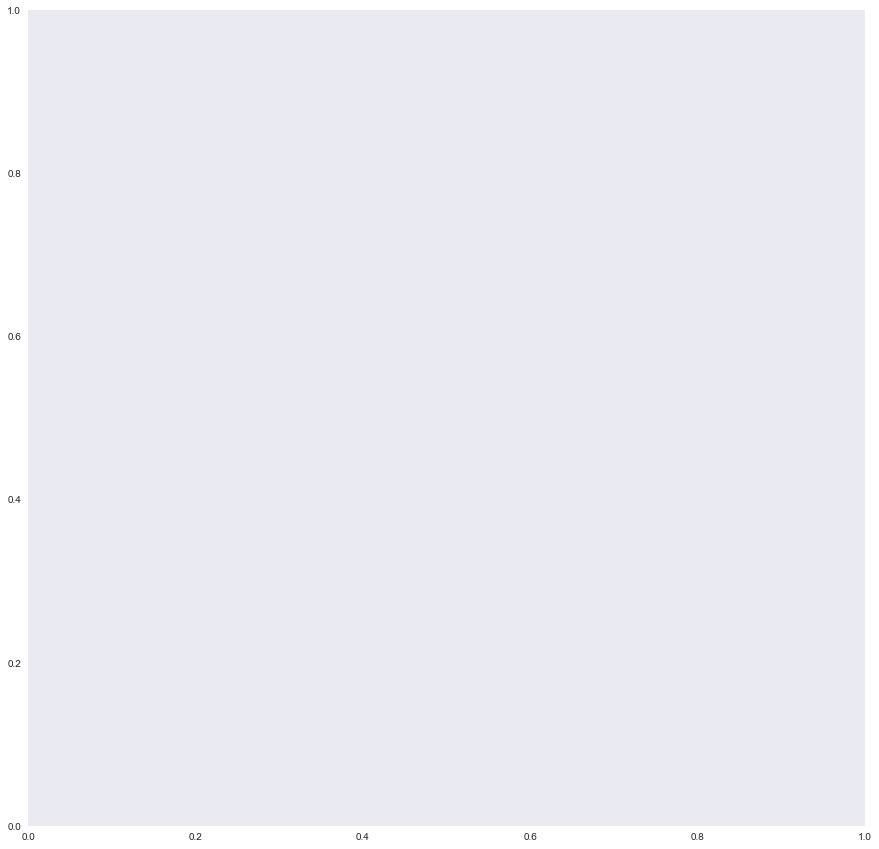

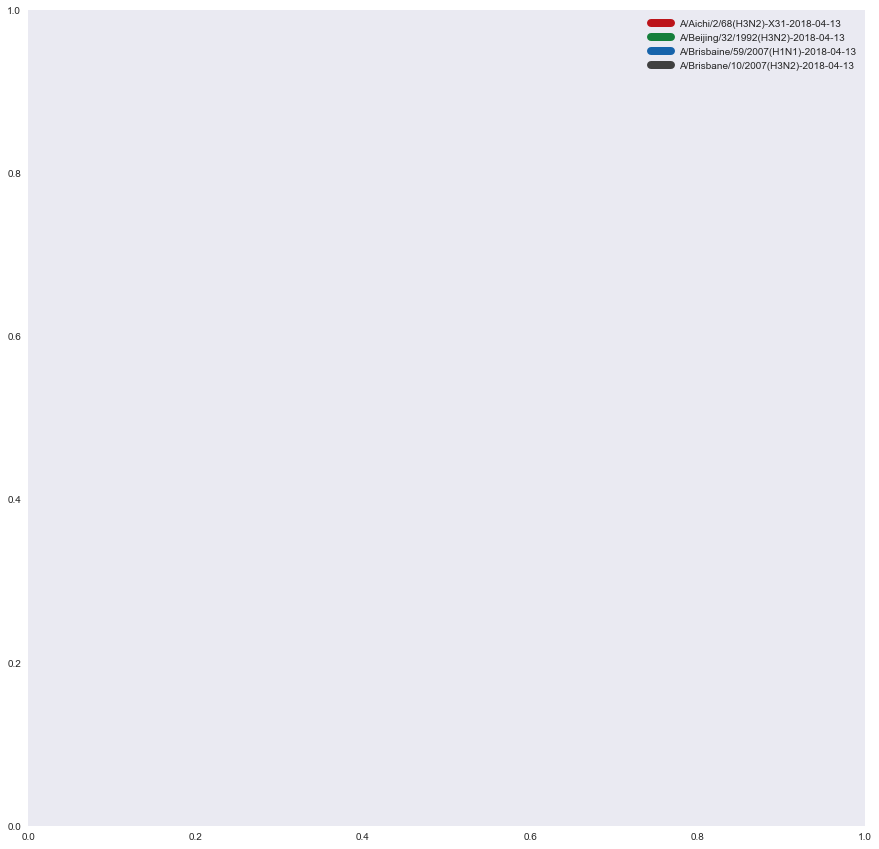

In [79]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

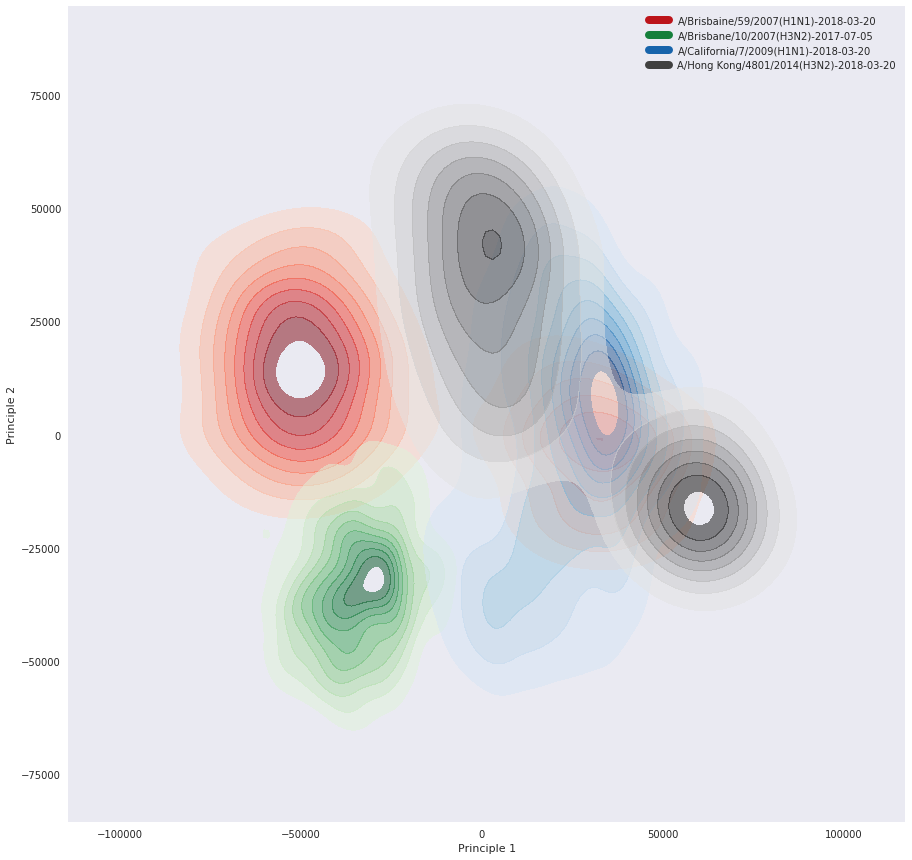

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()